In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv') 
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [4]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted into Integer\n\n',columns)

Below Columns have object datatype which needs to be converted into Integer

 ['msisdn', 'pcircle', 'pdate']


In [5]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Database has No Null values

In [6]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Unnamed: 0 column has 209593 categorical data counts

label column has 2 categorical data counts

msisdn column has 186243 categorical data counts

aon column has 4507 categorical data counts

daily_decr30 column has 147025 categorical data counts

daily_decr90 column has 158669 categorical data counts

rental30 column has 132148 categorical data counts

rental90 column has 141033 categorical data counts

last_rech_date_ma column has 1186 categorical data counts

last_rech_date_da column has 1174 categorical data counts

last_rech_amt_ma column has 70 categorical data counts

cnt_ma_rech30 column has 71 categorical data counts

fr_ma_rech30 column has 1083 categorical data counts

sumamnt_ma_rech30 column has 15141 categorical data counts

medianamnt_ma_rech30 column has 510 categorical data counts

medianmarechprebal30 column has 30428 categorical data counts

cnt_ma_rech90 column has 110 categorical data counts

fr_ma_rech90 column has 89 categorical data counts

sumamnt_ma_rech90 co

label, maxamnt_loans90 and pcircle columns are categorical

In [7]:
df = df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1)

- Unnamed: 0 and msisdn are the unique identifiers hence have dropped those columns
- pcircle has only one data hence it is not useful hence dropping that column

In [8]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [9]:
a = 0

lower = df.iloc[np.where(df['aon'] < (a))]

b = lower.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1539


In [10]:
a = 2441

upper = df.iloc[np.where(df['aon'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  2089


In [11]:
a = 35

upper = df.iloc[np.where(df['cnt_da_rech30'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1027


In [12]:
a = 26

upper = df.iloc[np.where(df['fr_da_rech30'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1020


In [13]:
a = 13

upper = df.iloc[np.where(df['maxamnt_loans30'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1018


In [14]:
a = 72

upper = df.iloc[np.where(df['cnt_loans90'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data) 


Data Loss -  1010


In [15]:
a = 114

upper = df.iloc[np.where(df['last_rech_date_ma'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1017


In [16]:
a = 116

upper = df.iloc[np.where(df['last_rech_date_da'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  1011


In [17]:
a = 39

upper = df.iloc[np.where(df['fr_ma_rech30'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  998


In [18]:
a = 28000

upper = df.iloc[np.where(df['medianmarechprebal30'] > (a))]

b = upper.index

old_data = (df.shape)[0]
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

new_data = (df.shape)[0]
print('Data Loss - ', old_data - new_data)

Data Loss -  983


1. aon column represents the age on cellular network in days however days can not be in minus and more than 5 lacs hence have dropped those records.
2. cnt_da_rech30 column represents the Number of times data account got recharged in last 30 days however it seems incorrect and uncommon that there are more than 5k times the account got recharged hence dropped those data.
3. fr_da_rech30 column represents the Frequency of data account recharged in last 30 days however it seems incorrect and uncommon that there are more than 5 lac times the account got recharged hence dropped those data.
4. maxamnt_loans30 column represents maximum amount of loan taken by the user in last 30 days (There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively) hence have removed other data.
5. cnt_loans90 columns shows Number of loans taken by user in last 90 days however it seems incorrect and uncommon that there are more than 1k times the account got loans hence dropped those data.
6. last_rech_date_ma column shows Number of days till last recharge of main account, however it seems incorrect and uncommon that there are more than 5 lacs days till last recharge of main account hence dropped those data.
7. last_rech_date_da column shows Number of days till last recharge of data account, however it seems incorrect and uncommon that there are more than 5 lacs days till last recharge of data account hence dropped those data.
8. fr_ma_rech30 column shows the frequency of main account recharged in last 30 days, however it seems incorrect and uncommon that there are more than 5 lacs of frequency hence dropped those data.
9. medianmarechprebal30 column shows median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) however it seems incorrect and uncommon that there are more than 5 lacs of Rupiah hence dropped those data.

Data looks fine to encode into Int

In [19]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [20]:
describe = df.describe()

In [21]:
describe.T

,count,mean,std,min,25%,50%,75%,max
label,197881.0,0.876668,0.328818,0.000000,1.00,1.000000,1.00,1.00
aon,197881.0,660.182413,497.710405,1.000000,248.00,525.000000,967.00,2440.00
daily_decr30,197881.0,5420.802081,9246.835657,-93.012667,43.68,1507.500000,7305.00,265926.00
daily_decr90,197881.0,6127.263107,10952.986710,-93.012667,43.89,1536.550000,7883.48,320630.00
rental30,197881.0,2704.900662,4325.086381,-23737.140000,284.62,1092.000000,3373.92,198926.11
rental90,197881.0,3501.049773,5788.674156,-24720.580000,305.90,1346.830000,4229.64,200148.11
last_rech_date_ma,197881.0,6.003901,9.653028,-29.000000,1.00,3.000000,7.00,113.00
last_rech_date_da,197881.0,0.944254,7.086992,-29.000000,0.00,0.000000,0.00,115.00
last_rech_amt_ma,197881.0,2072.638182,2369.299461,0.000000,770.00,1539.000000,2309.00,55000.00
cnt_ma_rech30,197881.0,3.997008,4.259199,0.000000,1.00,3.000000,5.00,203.00


In [22]:
x = df.drop(['label'],axis=1)
y = df['label']

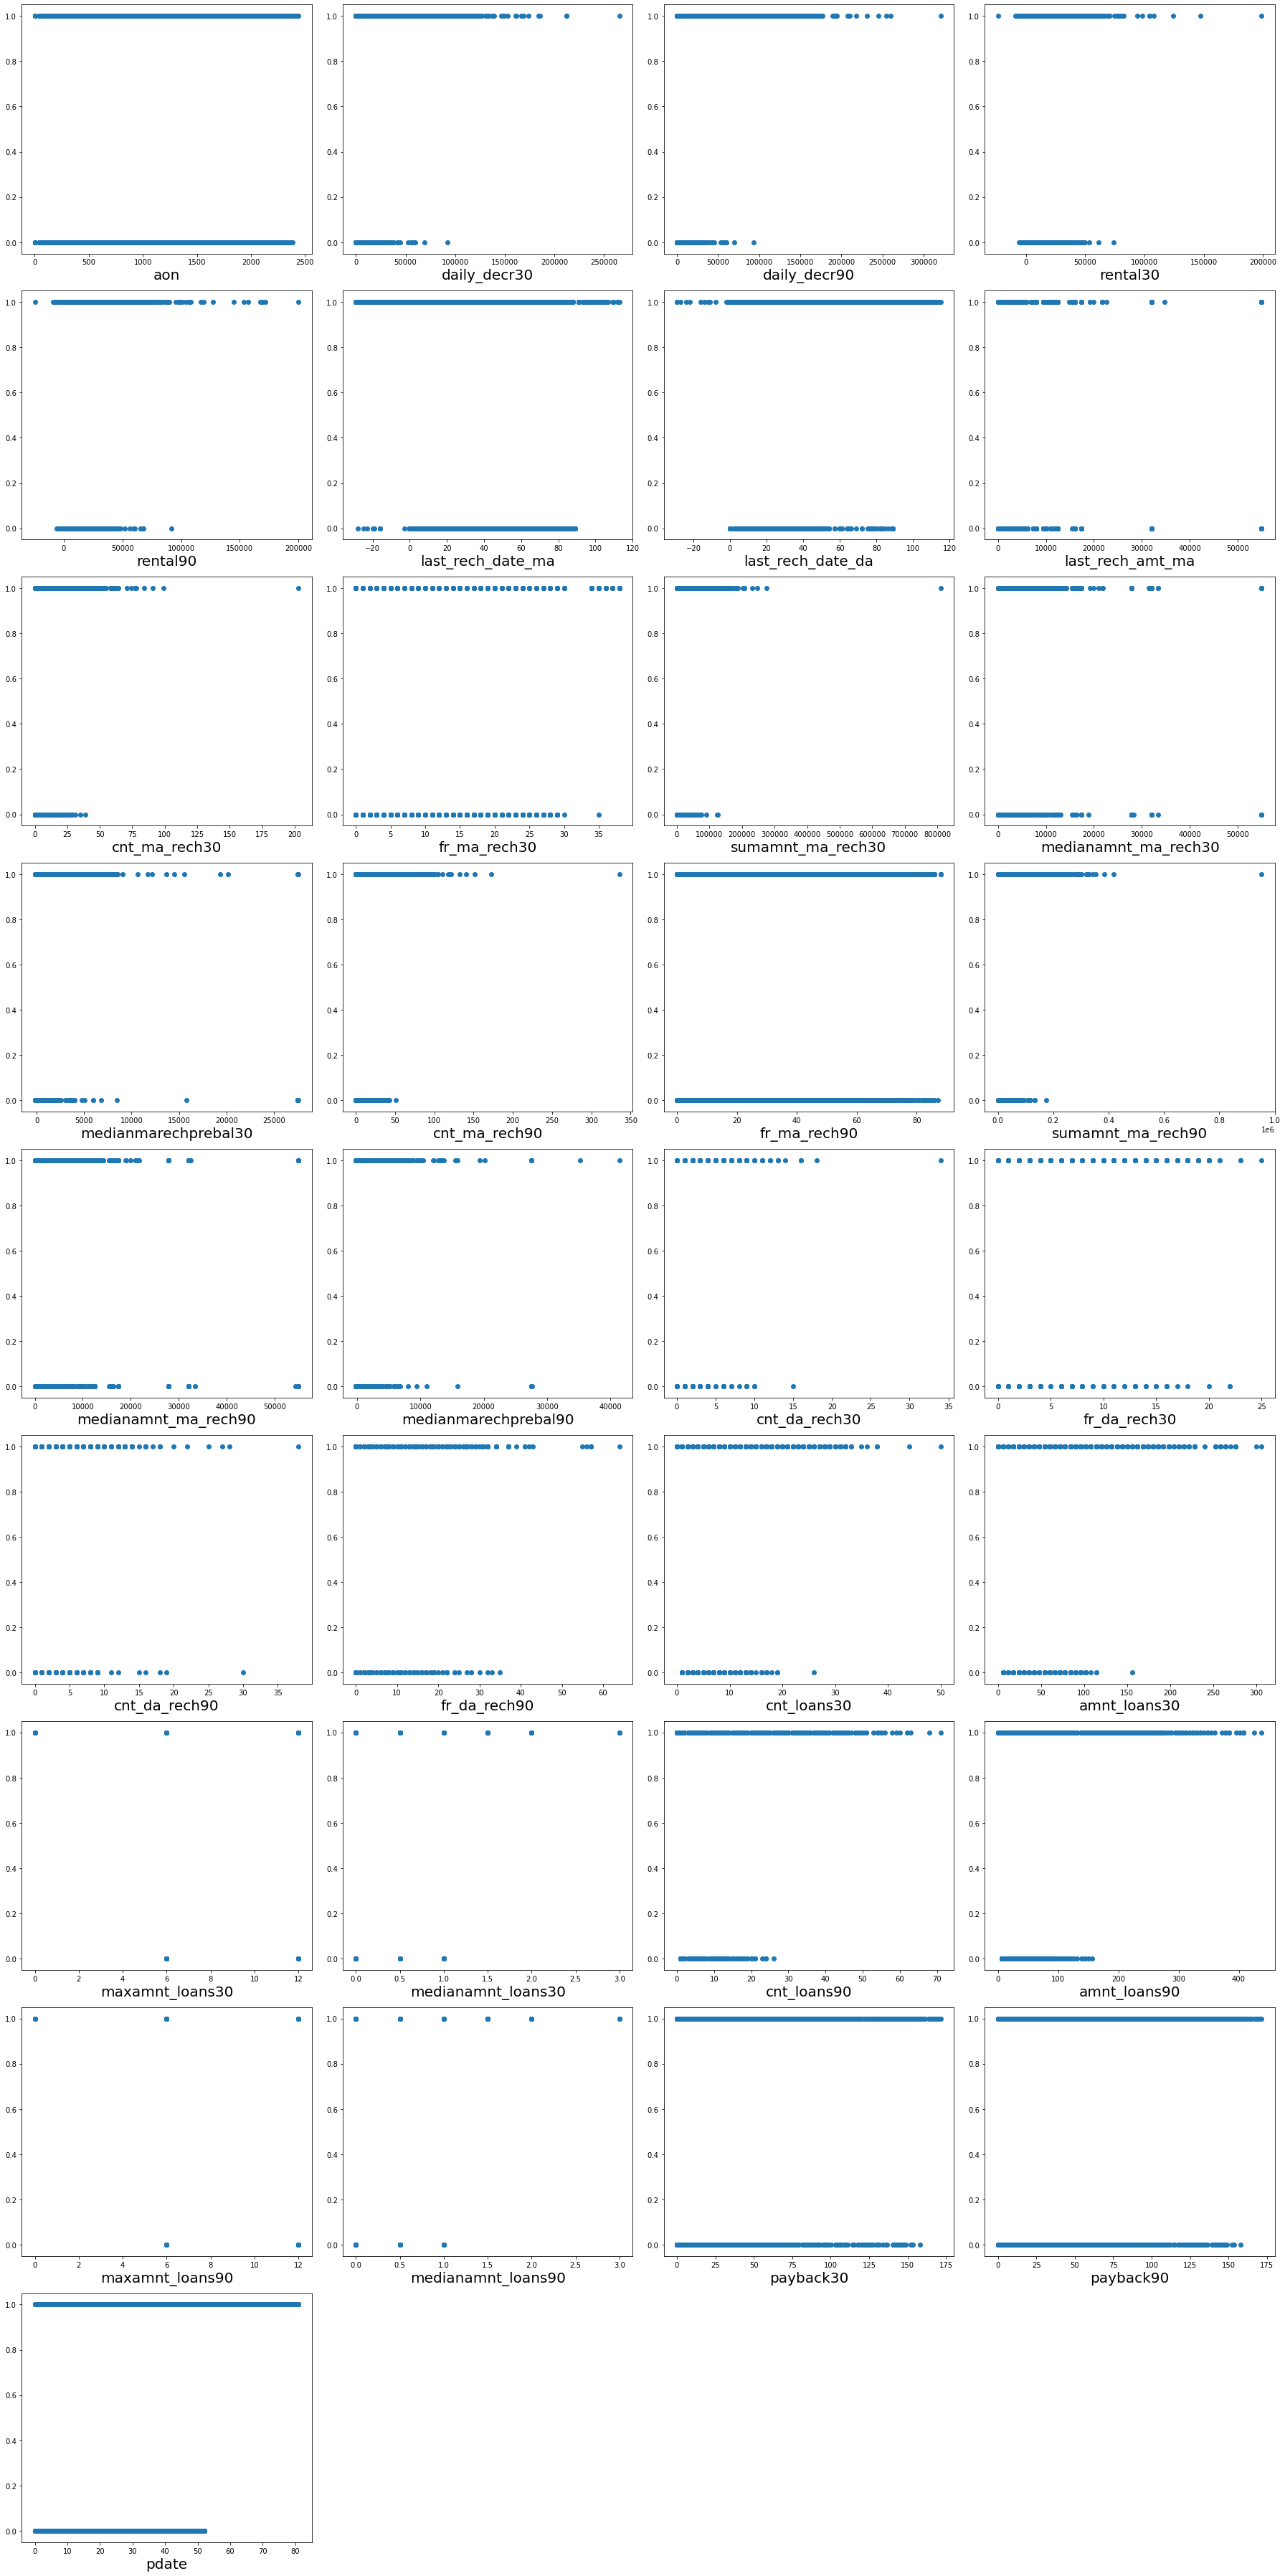

In [23]:
plt.figure(figsize=(25,50), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 36:
        ax = plt.subplot(9,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [24]:
for i in df.columns:
    a = df[i].corr(df['label'])
    print(i,'=',a)

label = 1.0
aon = 0.074664531436835
daily_decr30 = 0.16760537600870015
daily_decr90 = 0.1654640554731383
rental30 = 0.05712676737282222
rental90 = 0.07463146373181326
last_rech_date_ma = -0.09890434544771172
last_rech_date_da = 0.02430467993246635
last_rech_amt_ma = 0.1313453738939613
cnt_ma_rech30 = 0.23666016108547414
fr_ma_rech30 = 0.14159843733849203
sumamnt_ma_rech30 = 0.20238538731666
medianamnt_ma_rech30 = 0.1412777103091224
medianmarechprebal30 = 0.052255191522904296
cnt_ma_rech90 = 0.2354421376548643
fr_ma_rech90 = 0.08338702499575773
sumamnt_ma_rech90 = 0.20500219431285563
medianamnt_ma_rech90 = 0.12040988123846115
medianmarechprebal90 = 0.03948474282156995
cnt_da_rech30 = 0.002838898976014186
fr_da_rech30 = -0.005089767659950268
cnt_da_rech90 = 0.0037155513363442134
fr_da_rech90 = -0.004995041823068602
cnt_loans30 = 0.19524147574206757
amnt_loans30 = 0.1963251172069187
maxamnt_loans30 = 0.07343036191838279
medianamnt_loans30 = 0.04523768207653968
cnt_loans90 = 0.199226928996

- cnt_da_rech30, fr_da_rech30, cnt_da_rech90 and fr_da_rech90 has no co-relation with Label.
- cnt_ma_rech30, sumamnt_ma_rech30, cnt_ma_rech90 and sumamnt_ma_rech90 has high co-relation with Label.

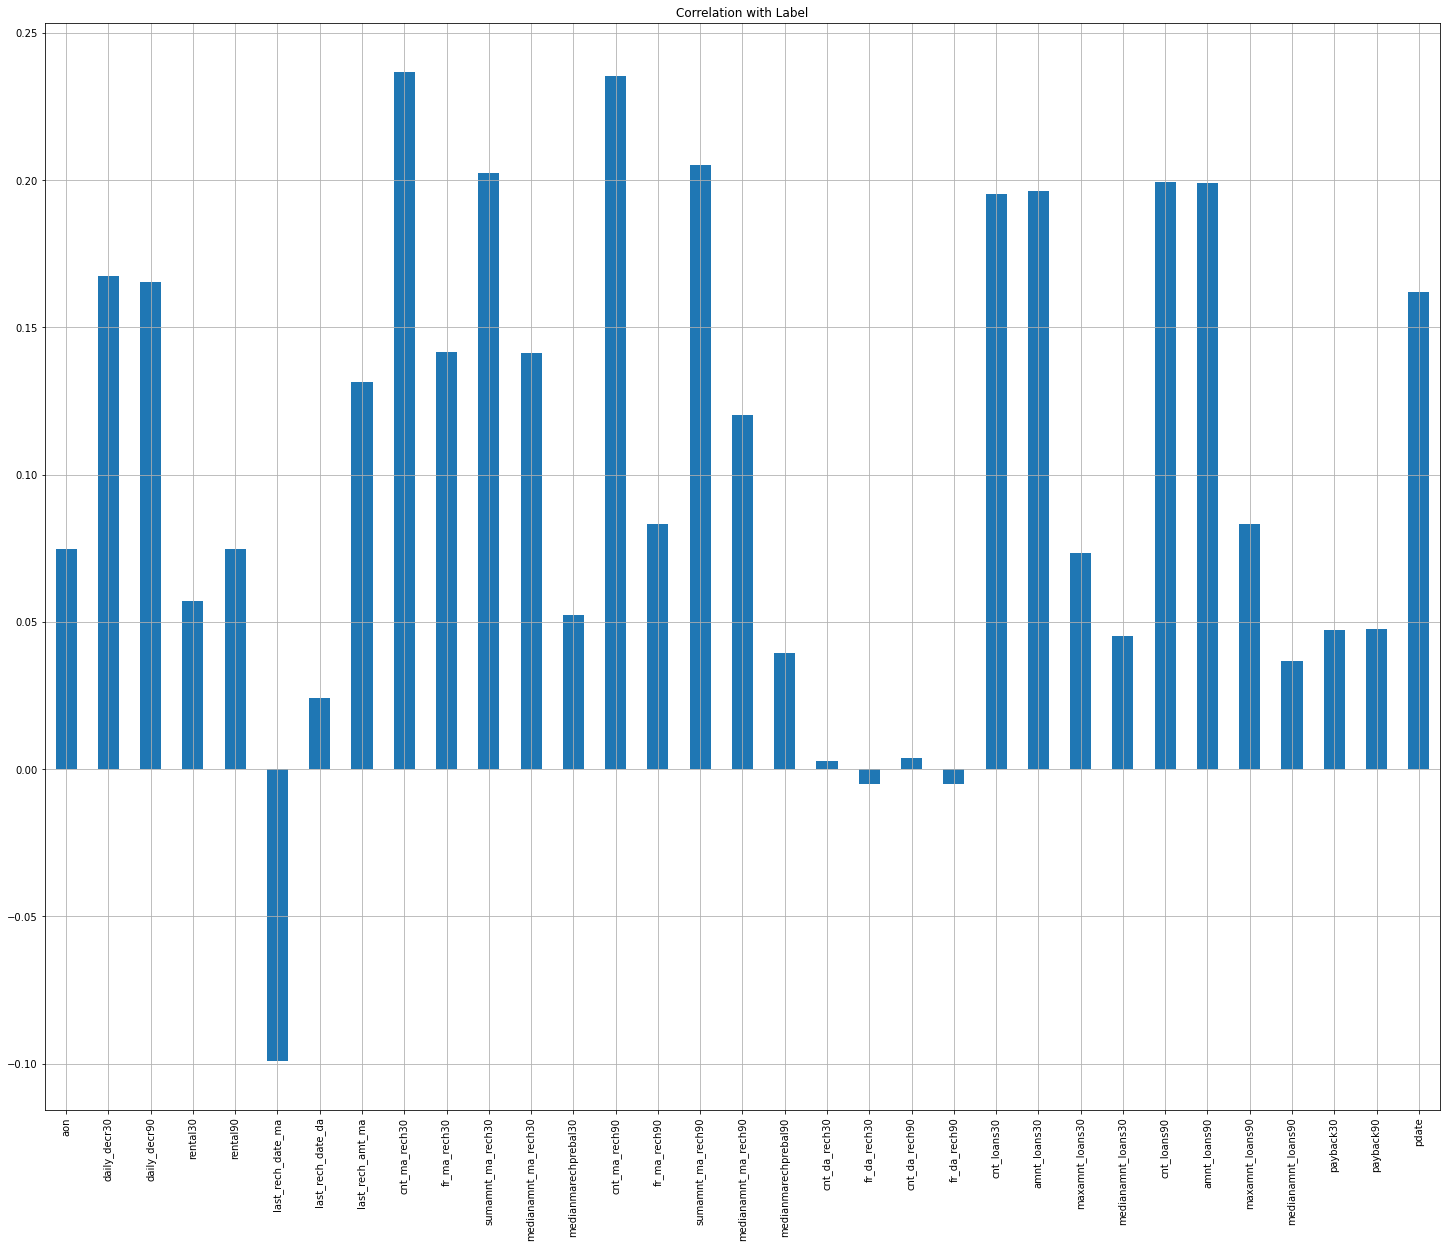

In [25]:
df.drop('label',axis=1).corrwith(df.label).plot(kind='bar',grid=True,figsize=(25,20),
                                                     title="Correlation with Label")
plt.show()

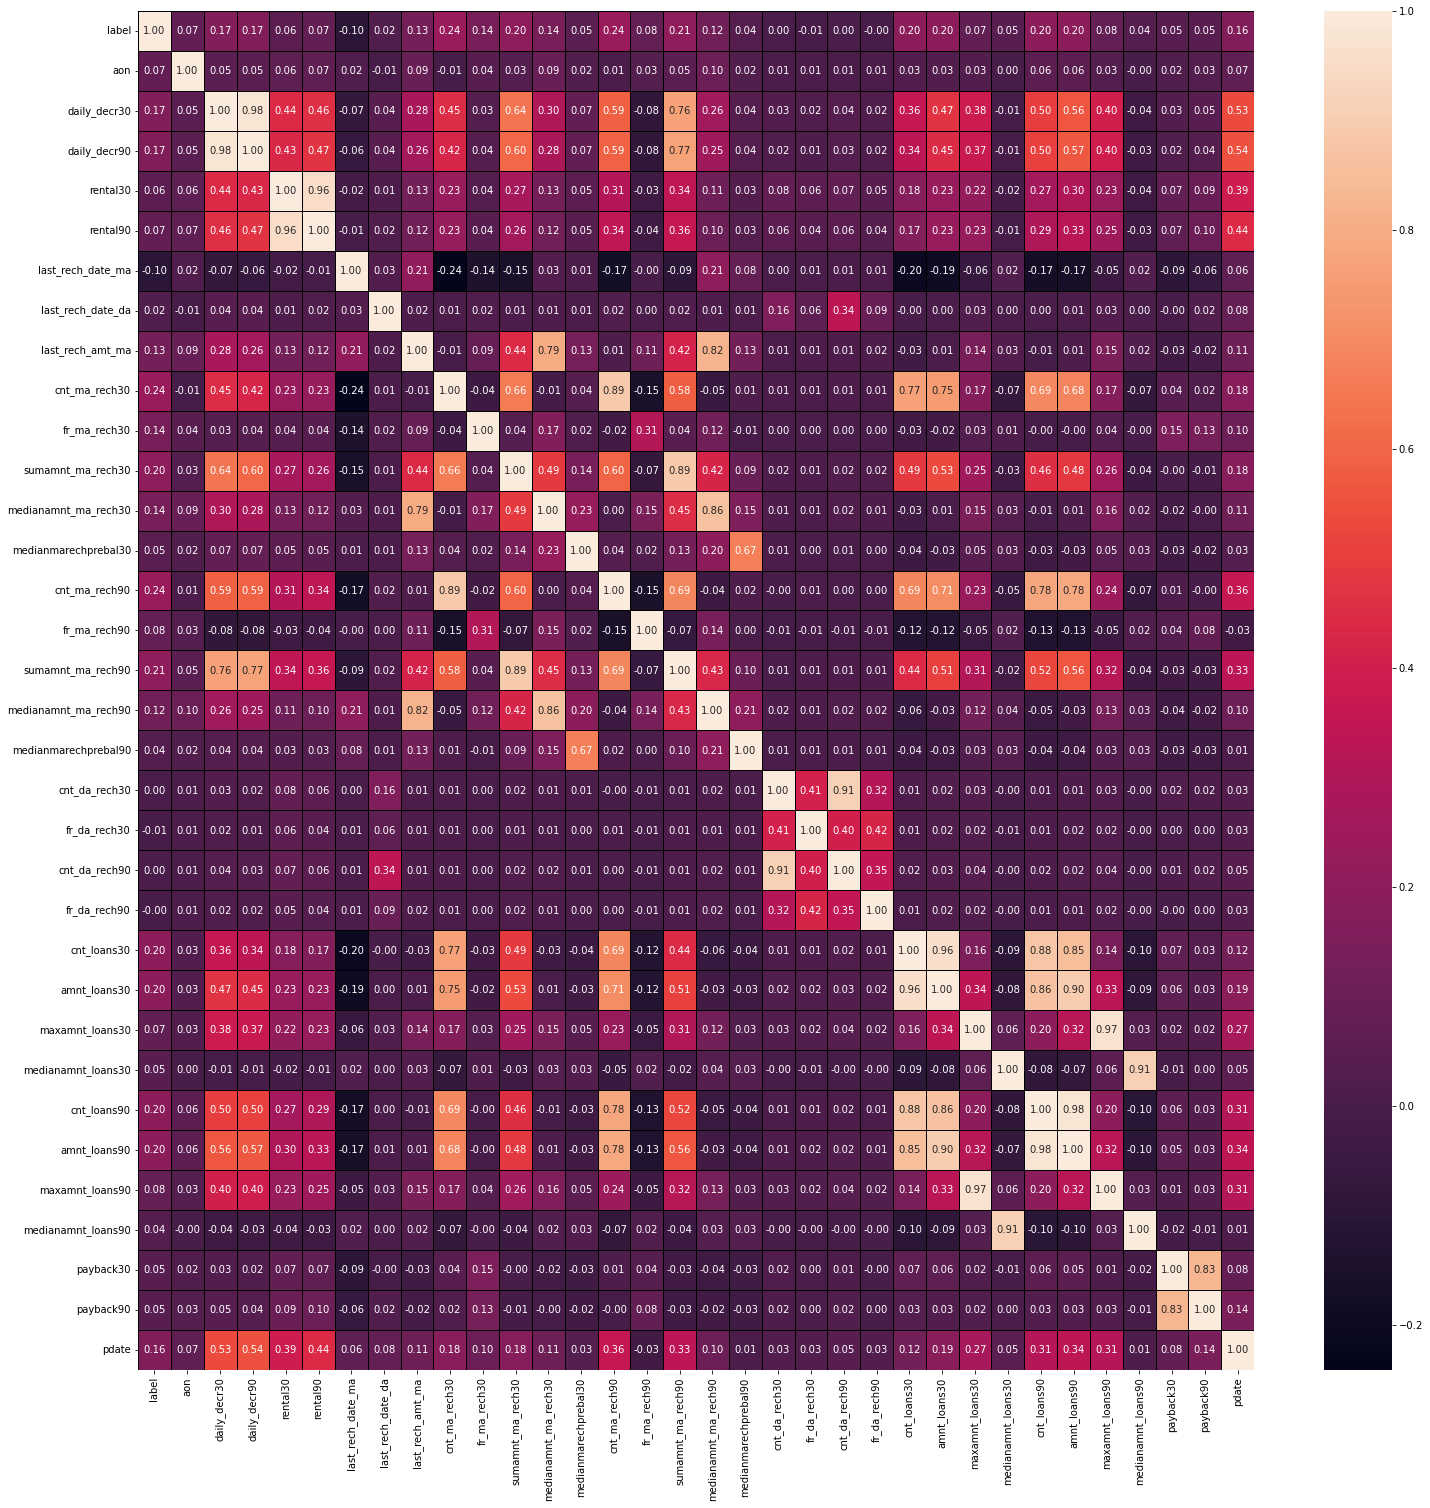

In [26]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem exist in this database

1. 'daily_decr30' and 'daily_decr90' columns has Multicollinearity problem
2. 'rental30' and 'rental90' columns has Multicollinearity problem
3. 'cnt_loans30' and 'amnt_loans30' columns has Multicollinearity problem
4. 'cnt_da_rech30' and 'cnt_da_rech90' columns has Multicollinearity problem
5. 'maxamnt_loans30' and 'maxamnt_loans90' columns has Multicollinearity problem
6. 'cnt_loans90' and 'amnt_loans90' columns has Multicollinearity problem
7. 'medianamnt_loans30' and 'medianamnt_loans90' columns has Multicollinearity problem

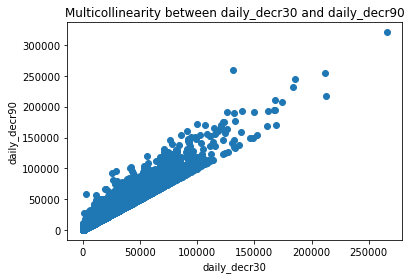

In [27]:
x = df['daily_decr30']
y = df['daily_decr90']
plt.scatter(x,y)
plt.xlabel('daily_decr30')
plt.ylabel('daily_decr90')
plt.title('Multicollinearity between daily_decr30 and daily_decr90')
plt.show()

daily_decr30 and daily_decr90 has high co-relation.

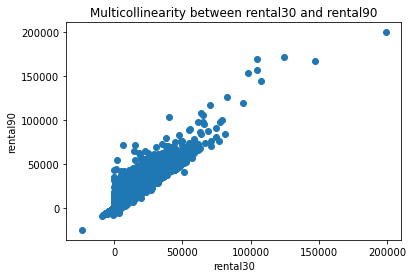

In [28]:
x = df['rental30']
y = df['rental90']
plt.scatter(x,y)
plt.xlabel('rental30')
plt.ylabel('rental90')
plt.title('Multicollinearity between rental30 and rental90')
plt.show()

rental30 and rental90 has high co-relation.

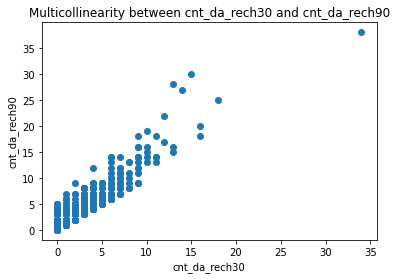

In [29]:
x = df['cnt_da_rech30']
y = df['cnt_da_rech90']
plt.scatter(x,y)
plt.xlabel('cnt_da_rech30')
plt.ylabel('cnt_da_rech90')
plt.title('Multicollinearity between cnt_da_rech30 and cnt_da_rech90')
plt.show()

cnt_da_rech30 and cnt_da_rech90 has a good co-relation.

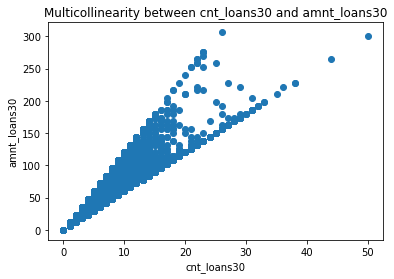

In [30]:
x = df['cnt_loans30']
y = df['amnt_loans30']
plt.scatter(x,y)
plt.xlabel('cnt_loans30')
plt.ylabel('amnt_loans30')
plt.title('Multicollinearity between cnt_loans30 and amnt_loans30')
plt.show()

cnt_loans30 and amnt_loans30 has a good co-relation

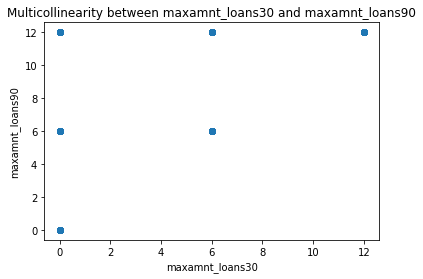

In [31]:
x = df['maxamnt_loans30']
y = df['maxamnt_loans90']
plt.scatter(x,y)
plt.xlabel('maxamnt_loans30')
plt.ylabel('maxamnt_loans90')
plt.title('Multicollinearity between maxamnt_loans30 and maxamnt_loans90')
plt.show()

maxamnt_loans30 and maxamnt_loans90 has no much co-relation.

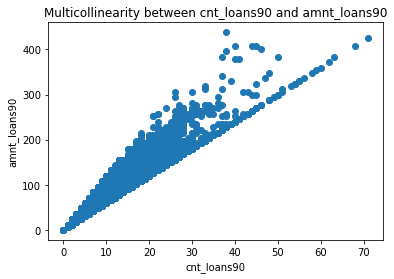

In [32]:
x = df['cnt_loans90']
y = df['amnt_loans90']
plt.scatter(x,y)
plt.xlabel('cnt_loans90')
plt.ylabel('amnt_loans90')
plt.title('Multicollinearity between cnt_loans90 and amnt_loans90')
plt.show()

cnt_loans90 and amnt_loans90 has a good co-relation.

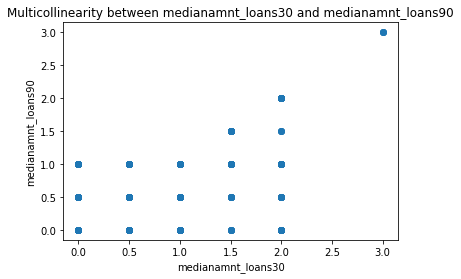

In [33]:
x = df['medianamnt_loans30']
y = df['medianamnt_loans90']
plt.scatter(x,y)
plt.xlabel('medianamnt_loans30')
plt.ylabel('medianamnt_loans90')
plt.title('Multicollinearity between medianamnt_loans30 and medianamnt_loans90')
plt.show()

medianamnt_loans30 and medianamnt_loans90 has less co-relation.

In [34]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
27,amnt_loans90,1440.323778
26,cnt_loans90,1267.817618
23,amnt_loans30,840.824560
22,cnt_loans30,716.430650
28,maxamnt_loans90,189.443789
24,maxamnt_loans30,181.297709
2,daily_decr90,44.524396
1,daily_decr30,41.857603
13,cnt_ma_rech90,29.570702
8,cnt_ma_rech30,28.764149


In [35]:
df = df.drop('amnt_loans90',axis=1) # amnt_loans90 has highest VIF score hence dropping the column

In [36]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
27,maxamnt_loans90,186.144475
24,maxamnt_loans30,178.023981
22,cnt_loans30,50.727225
2,daily_decr90,41.585665
1,daily_decr30,39.199657
23,amnt_loans30,39.021135
13,cnt_ma_rech90,29.560784
8,cnt_ma_rech30,28.761732
15,sumamnt_ma_rech90,23.377006
10,sumamnt_ma_rech30,20.106368


In [37]:
df = df.drop('maxamnt_loans90',axis=1) # maxamnt_loans90 has highest VIF score hence dropping the column

In [38]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
22,cnt_loans30,50.491608
2,daily_decr90,41.552978
1,daily_decr30,39.133968
23,amnt_loans30,38.948419
13,cnt_ma_rech90,29.550707
8,cnt_ma_rech30,28.695513
15,sumamnt_ma_rech90,23.369770
10,sumamnt_ma_rech30,20.099170
4,rental90,19.206367
3,rental30,18.385607


In [39]:
df = df.drop('cnt_loans30',axis=1) # cnt_loans30 has highest VIF score hence dropping the column

In [40]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
2,daily_decr90,41.216347
1,daily_decr30,39.113624
13,cnt_ma_rech90,27.057478
8,cnt_ma_rech30,24.423761
15,sumamnt_ma_rech90,23.282562
10,sumamnt_ma_rech30,20.039640
4,rental90,19.044788
3,rental30,18.288412
22,amnt_loans30,14.657488
25,cnt_loans90,12.897773


In [41]:
df = df.drop('daily_decr90',axis=1)  # daily_decr90 has highest VIF score hence dropping the column

In [42]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
12,cnt_ma_rech90,27.048433
7,cnt_ma_rech30,24.422924
14,sumamnt_ma_rech90,20.866022
9,sumamnt_ma_rech30,18.661668
3,rental90,17.793458
2,rental30,17.168044
21,amnt_loans30,14.575308
24,cnt_loans90,12.829292
15,medianamnt_ma_rech90,10.844840
10,medianamnt_ma_rech30,10.165355


In [43]:
df = df.drop('cnt_ma_rech90',axis=1) # cnt_ma_rech90 has highest VIF score hence dropping the column

In [44]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
3,rental90,17.544719
2,rental30,16.973031
9,sumamnt_ma_rech30,13.425784
13,sumamnt_ma_rech90,13.213072
20,amnt_loans30,13.023185
14,medianamnt_ma_rech90,10.313136
23,cnt_loans90,10.198538
10,medianamnt_ma_rech30,10.018997
18,cnt_da_rech90,8.057007
21,maxamnt_loans30,7.570900


In [45]:
df = df.drop('rental90',axis=1) # rental90 has highest VIF score hence dropping the column

In [46]:
x = df.drop('label',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
8,sumamnt_ma_rech30,13.202542
19,amnt_loans30,12.976701
12,sumamnt_ma_rech90,12.865763
13,medianamnt_ma_rech90,10.299075
22,cnt_loans90,10.140485
9,medianamnt_ma_rech30,10.018917
17,cnt_da_rech90,8.057006
20,maxamnt_loans30,7.557580
15,cnt_da_rech30,7.200211
6,cnt_ma_rech30,6.858375


In [47]:
df

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,fr_da_rech90,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,0,0,12,6.0,0.0,2.0,0.0,29.000000,29.000000,49.0
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0,0,12,12.0,0.0,1.0,0.0,0.000000,0.000000,70.0
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0,0,6,6.0,0.0,1.0,0.0,0.000000,0.000000,79.0
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0,0,12,6.0,0.0,2.0,0.0,0.000000,0.000000,5.0
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0,0,42,6.0,0.0,7.0,0.0,2.333333,2.333333,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197876,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,0,0,12,6.0,0.0,2.0,0.0,1.000000,1.000000,16.0
197877,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,...,0,0,18,6.0,0.0,3.0,0.0,1.000000,1.000000,11.0
197878,1,1013.0,11843.111667,5861.83,3.0,0.0,1539,5,8.0,9334.0,...,0,0,42,12.0,0.0,6.0,0.0,4.000000,3.833333,58.0
197879,1,1732.0,12488.228333,411.83,2.0,38.0,773,5,4.0,12154.0,...,1,0,18,12.0,0.0,3.0,0.0,0.000000,10.500000,54.0


In [48]:
x = df.drop('label',axis=1)
y = df['label']

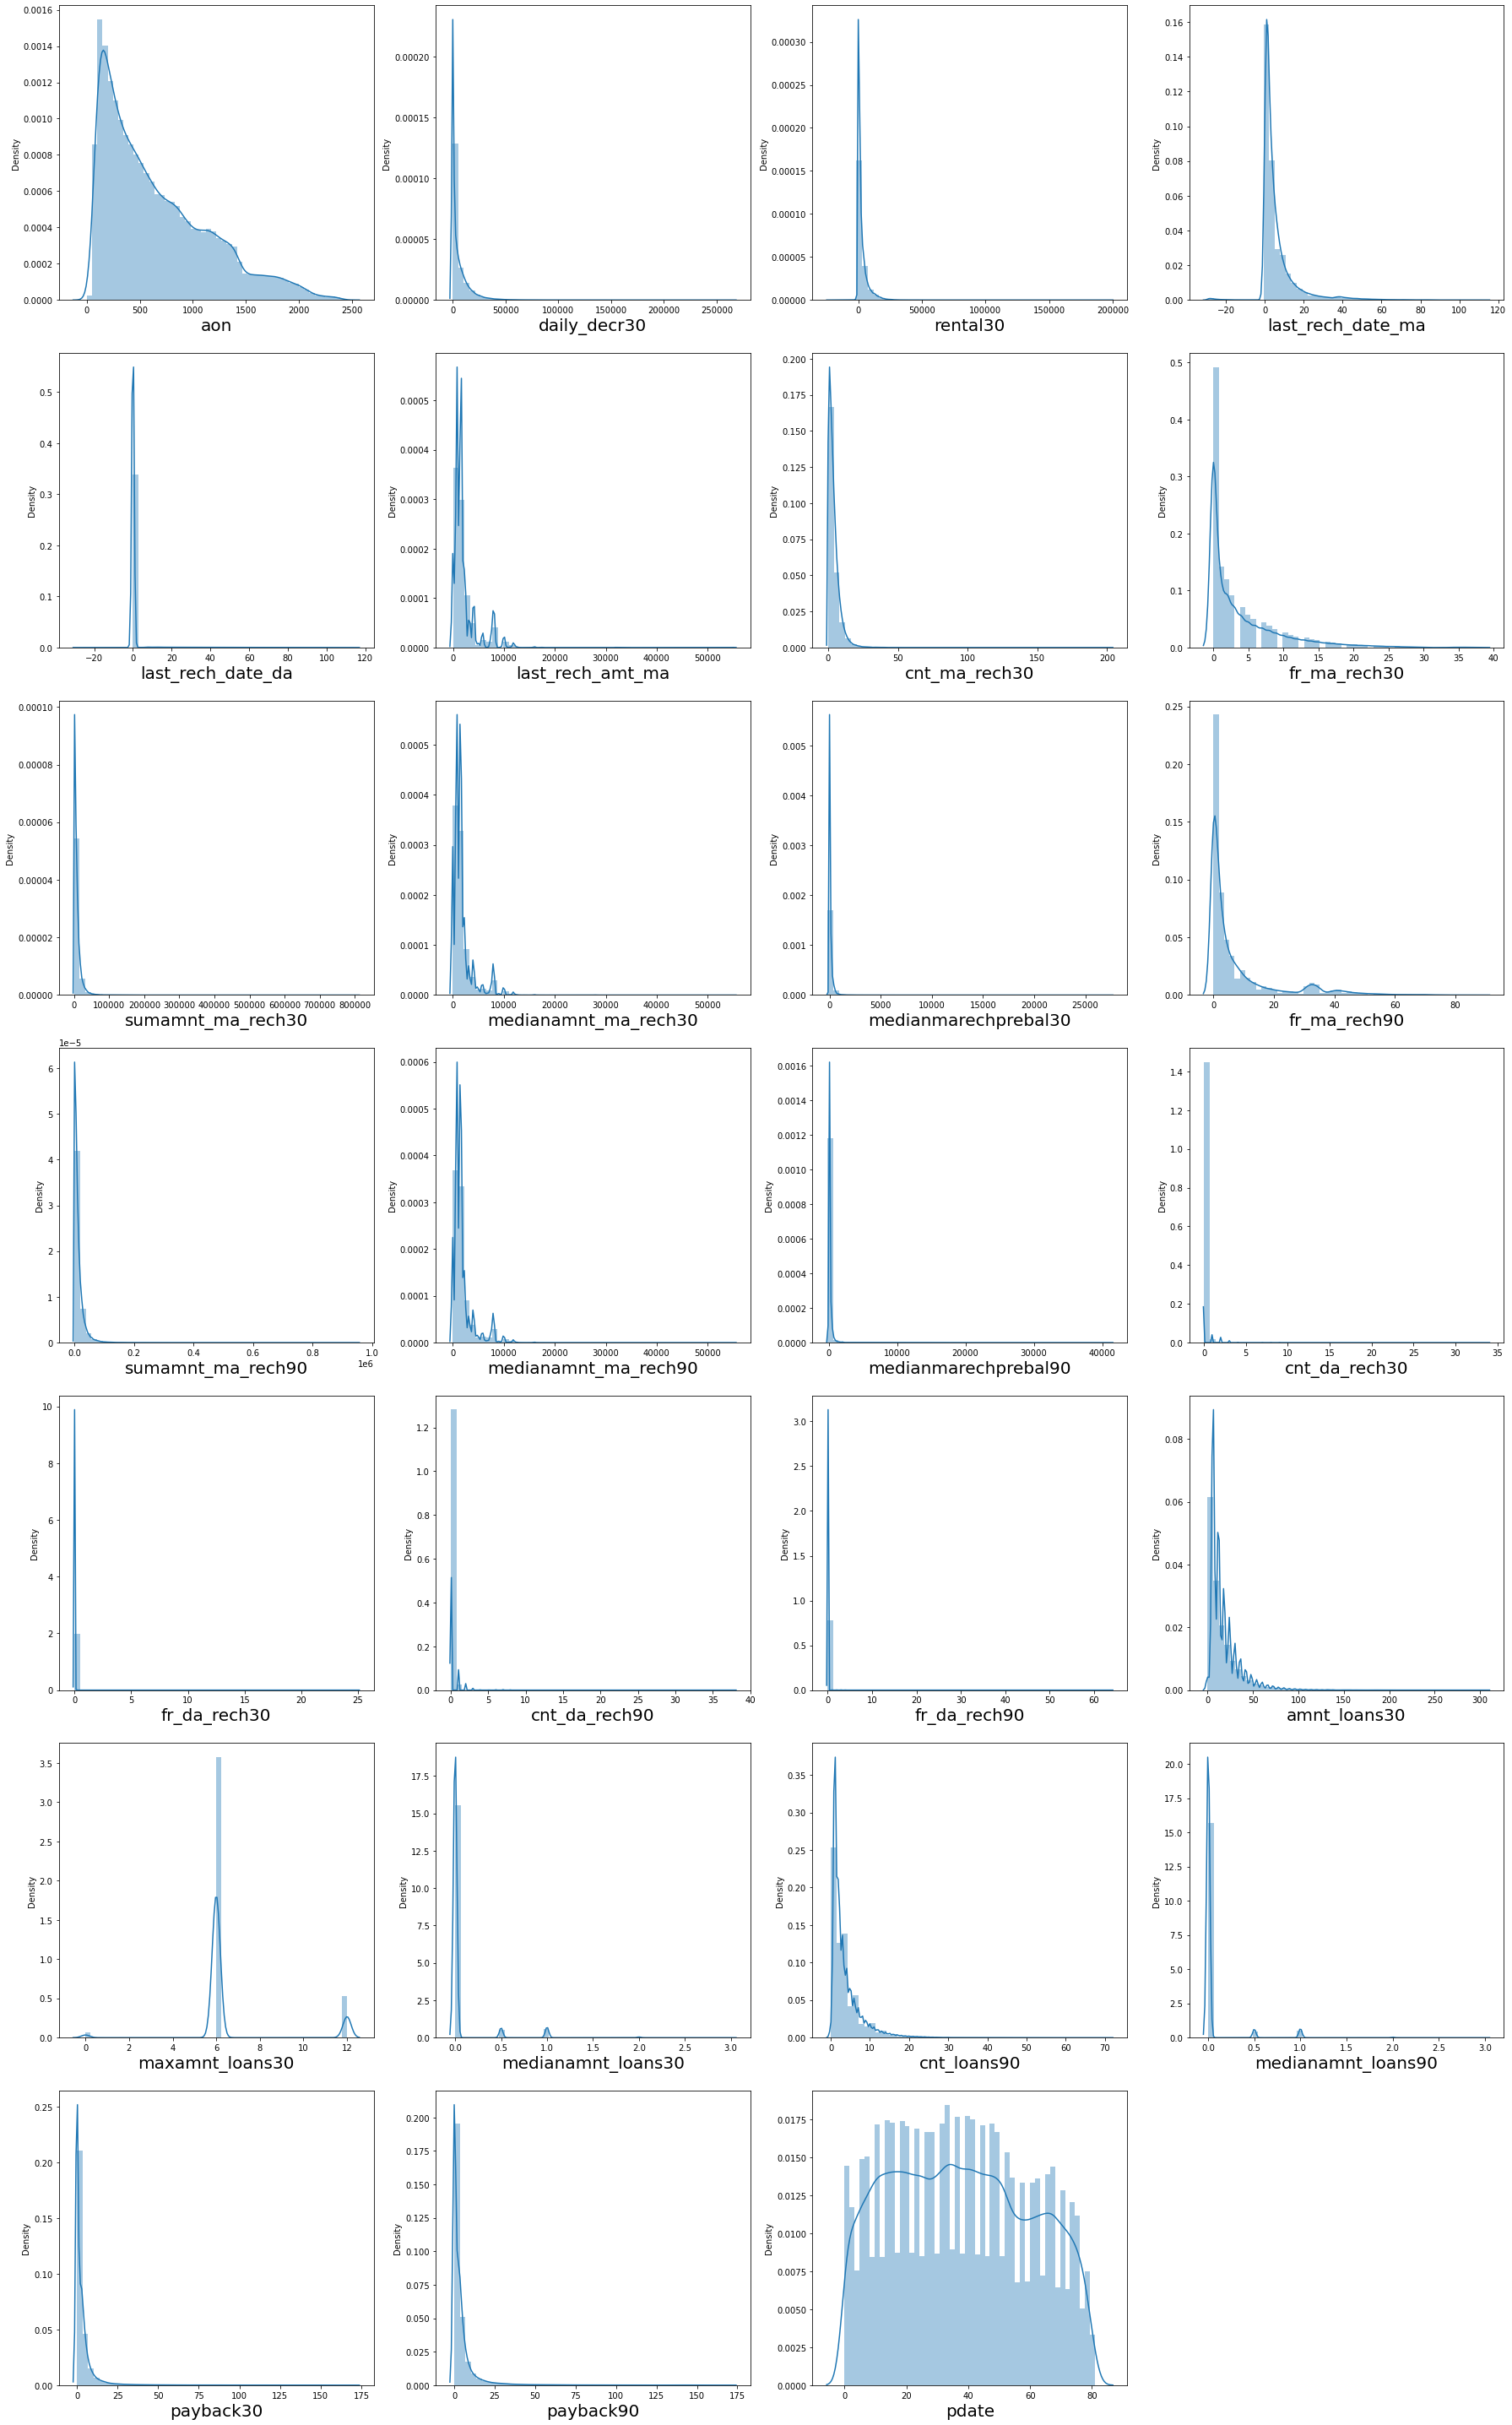

In [49]:
plt.figure(figsize=(25,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 28:
        ax = plt.subplot(7,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [50]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

label = -2.291064685214982
aon = 0.9512176458954527
daily_decr30 = 3.941384980895801
rental30 = 4.569741403075844
last_rech_date_ma = 3.1143187434256223
last_rech_date_da = 9.618004024973425
last_rech_amt_ma = 3.666828465064528
cnt_ma_rech30 = 3.2373677426350125
fr_ma_rech30 = 2.0183561354398942
sumamnt_ma_rech30 = 6.417519358359246
medianamnt_ma_rech30 = 3.4523562041388907
medianmarechprebal30 = 38.6974998513364
fr_ma_rech90 = 2.2859684644807117
sumamnt_ma_rech90 = 4.906973946646683
medianamnt_ma_rech90 = 3.727439661808897
medianmarechprebal90 = 44.645357387873744
cnt_da_rech30 = 30.94875344997695
fr_da_rech30 = 30.885342878952514
cnt_da_rech90 = 27.342180512789326
fr_da_rech90 = 29.071268532625968
amnt_loans30 = 2.953508015953587
maxamnt_loans30 = 1.417280982667722
medianamnt_loans30 = 4.57279560489643
cnt_loans90 = 2.9897326687940375
medianamnt_loans90 = 4.922930965087744
payback30 = 8.308039300992657
payback90 = 6.8844880769940415
pdate = 0.10892448612833697


- Not considering skewness of categorical data columns
- aon, daily_decr30, rental30, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, medianamnt_loans90, payback30, payback90 columns have skewness.

In [51]:
df.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,fr_da_rech90,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,...,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000,197881.000000
mean,0.876668,660.182413,5420.802081,2704.900662,6.003901,0.944254,2072.638182,3.997008,3.908026,7747.360343,...,0.042005,0.045628,18.040540,6.664339,0.053707,3.712443,0.045767,3.411599,4.341347,37.680611
std,0.328818,497.710405,9246.835657,4325.086381,9.653028,7.086992,2369.299461,4.259199,5.438249,10143.121079,...,0.401778,0.945933,17.406435,2.161465,0.217332,4.035803,0.199881,8.818488,10.324438,21.963316
min,0.000000,1.000000,-93.012667,-23737.140000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,248.000000,43.680000,284.620000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,...,0.000000,0.000000,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,19.000000
50%,1.000000,525.000000,1507.500000,1092.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4633.000000,...,0.000000,0.000000,12.000000,6.000000,0.000000,2.000000,0.000000,0.000000,1.666667,37.000000
75%,1.000000,967.000000,7305.000000,3373.920000,7.000000,0.000000,2309.000000,5.000000,6.000000,10019.000000,...,0.000000,0.000000,24.000000,6.000000,0.000000,5.000000,0.000000,3.750000,4.500000,55.000000
max,1.000000,2440.000000,265926.000000,198926.110000,113.000000,115.000000,55000.000000,203.000000,38.000000,810096.000000,...,38.000000,64.000000,306.000000,12.000000,3.000000,71.000000,3.000000,171.500000,171.500000,81.000000


Database is ready to remove outliers if exist 

In [52]:
x = df.drop(['label'],axis=1)
y = df['label']

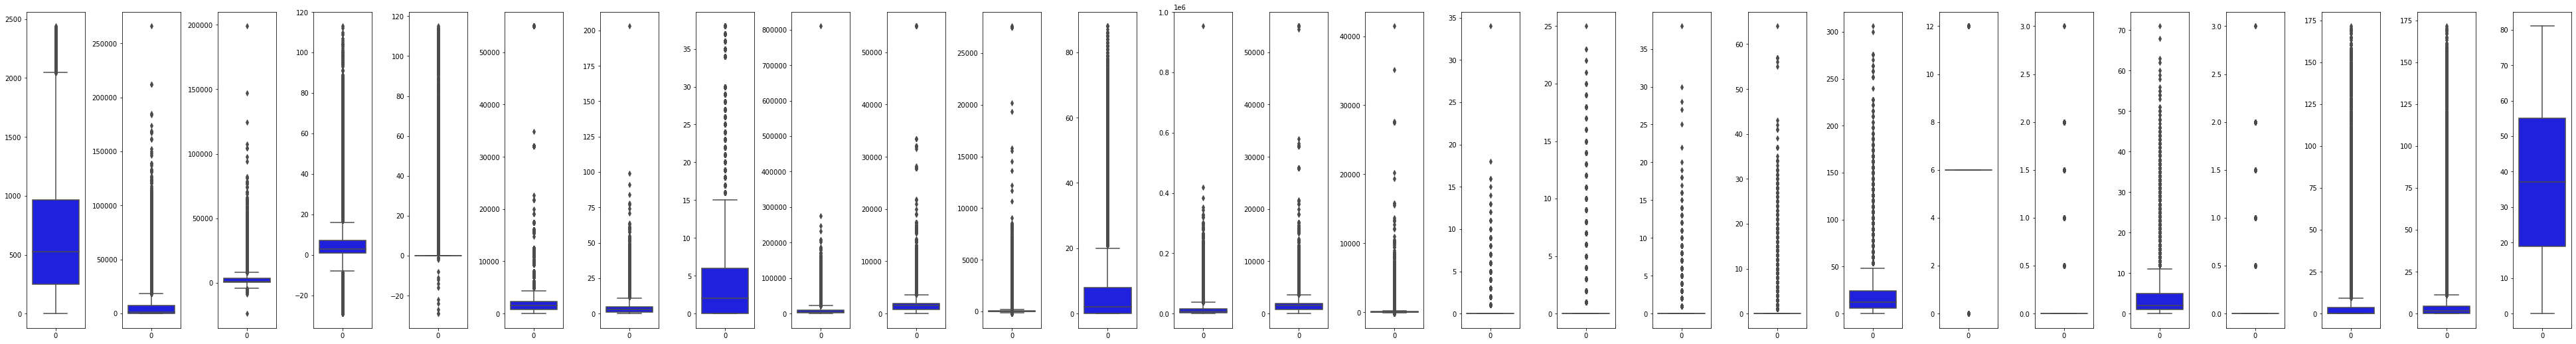

In [53]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (2*col,7*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

'payback30', 'amnt_loans30','payback90','aon', 'daily_decr30', 'rental30', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30','fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90' and 'amnt_loans30' Column has outliers

In [54]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate'],
      dtype='object')

In [55]:
old_data = (df.shape)[0]

In [56]:
x = df[['payback30', 'amnt_loans30','payback90','aon', 'daily_decr30', 'rental30', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30','fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30']]
for i in x.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    upper = df.iloc[np.where(df[i] > (q3+1.5*iqr))]
    lower = df.iloc[np.where(df[i] < (q1-1.5*iqr))]

    a = upper.index
    b = lower.index

    df.drop(a, inplace = True)
    df.drop(b, inplace = True)

    df = df.reset_index()
    df = df.drop('index',axis=1)

In [57]:
new_data = (df.shape)[0]

In [58]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 131691


Data Loss is very huge

In [60]:
x = df.drop(['label'],axis=1)
y = df['label']

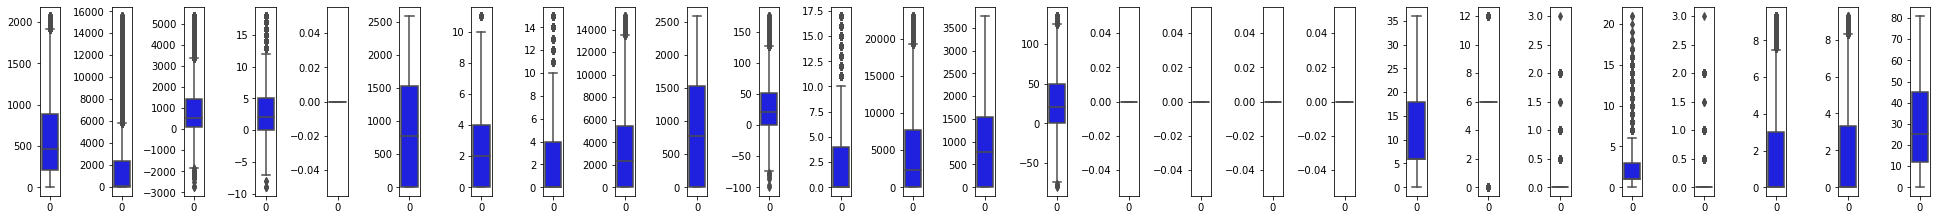

In [61]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Cleared all the outliers those are not allowed above and below specific limits

In [62]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate'],
      dtype='object')

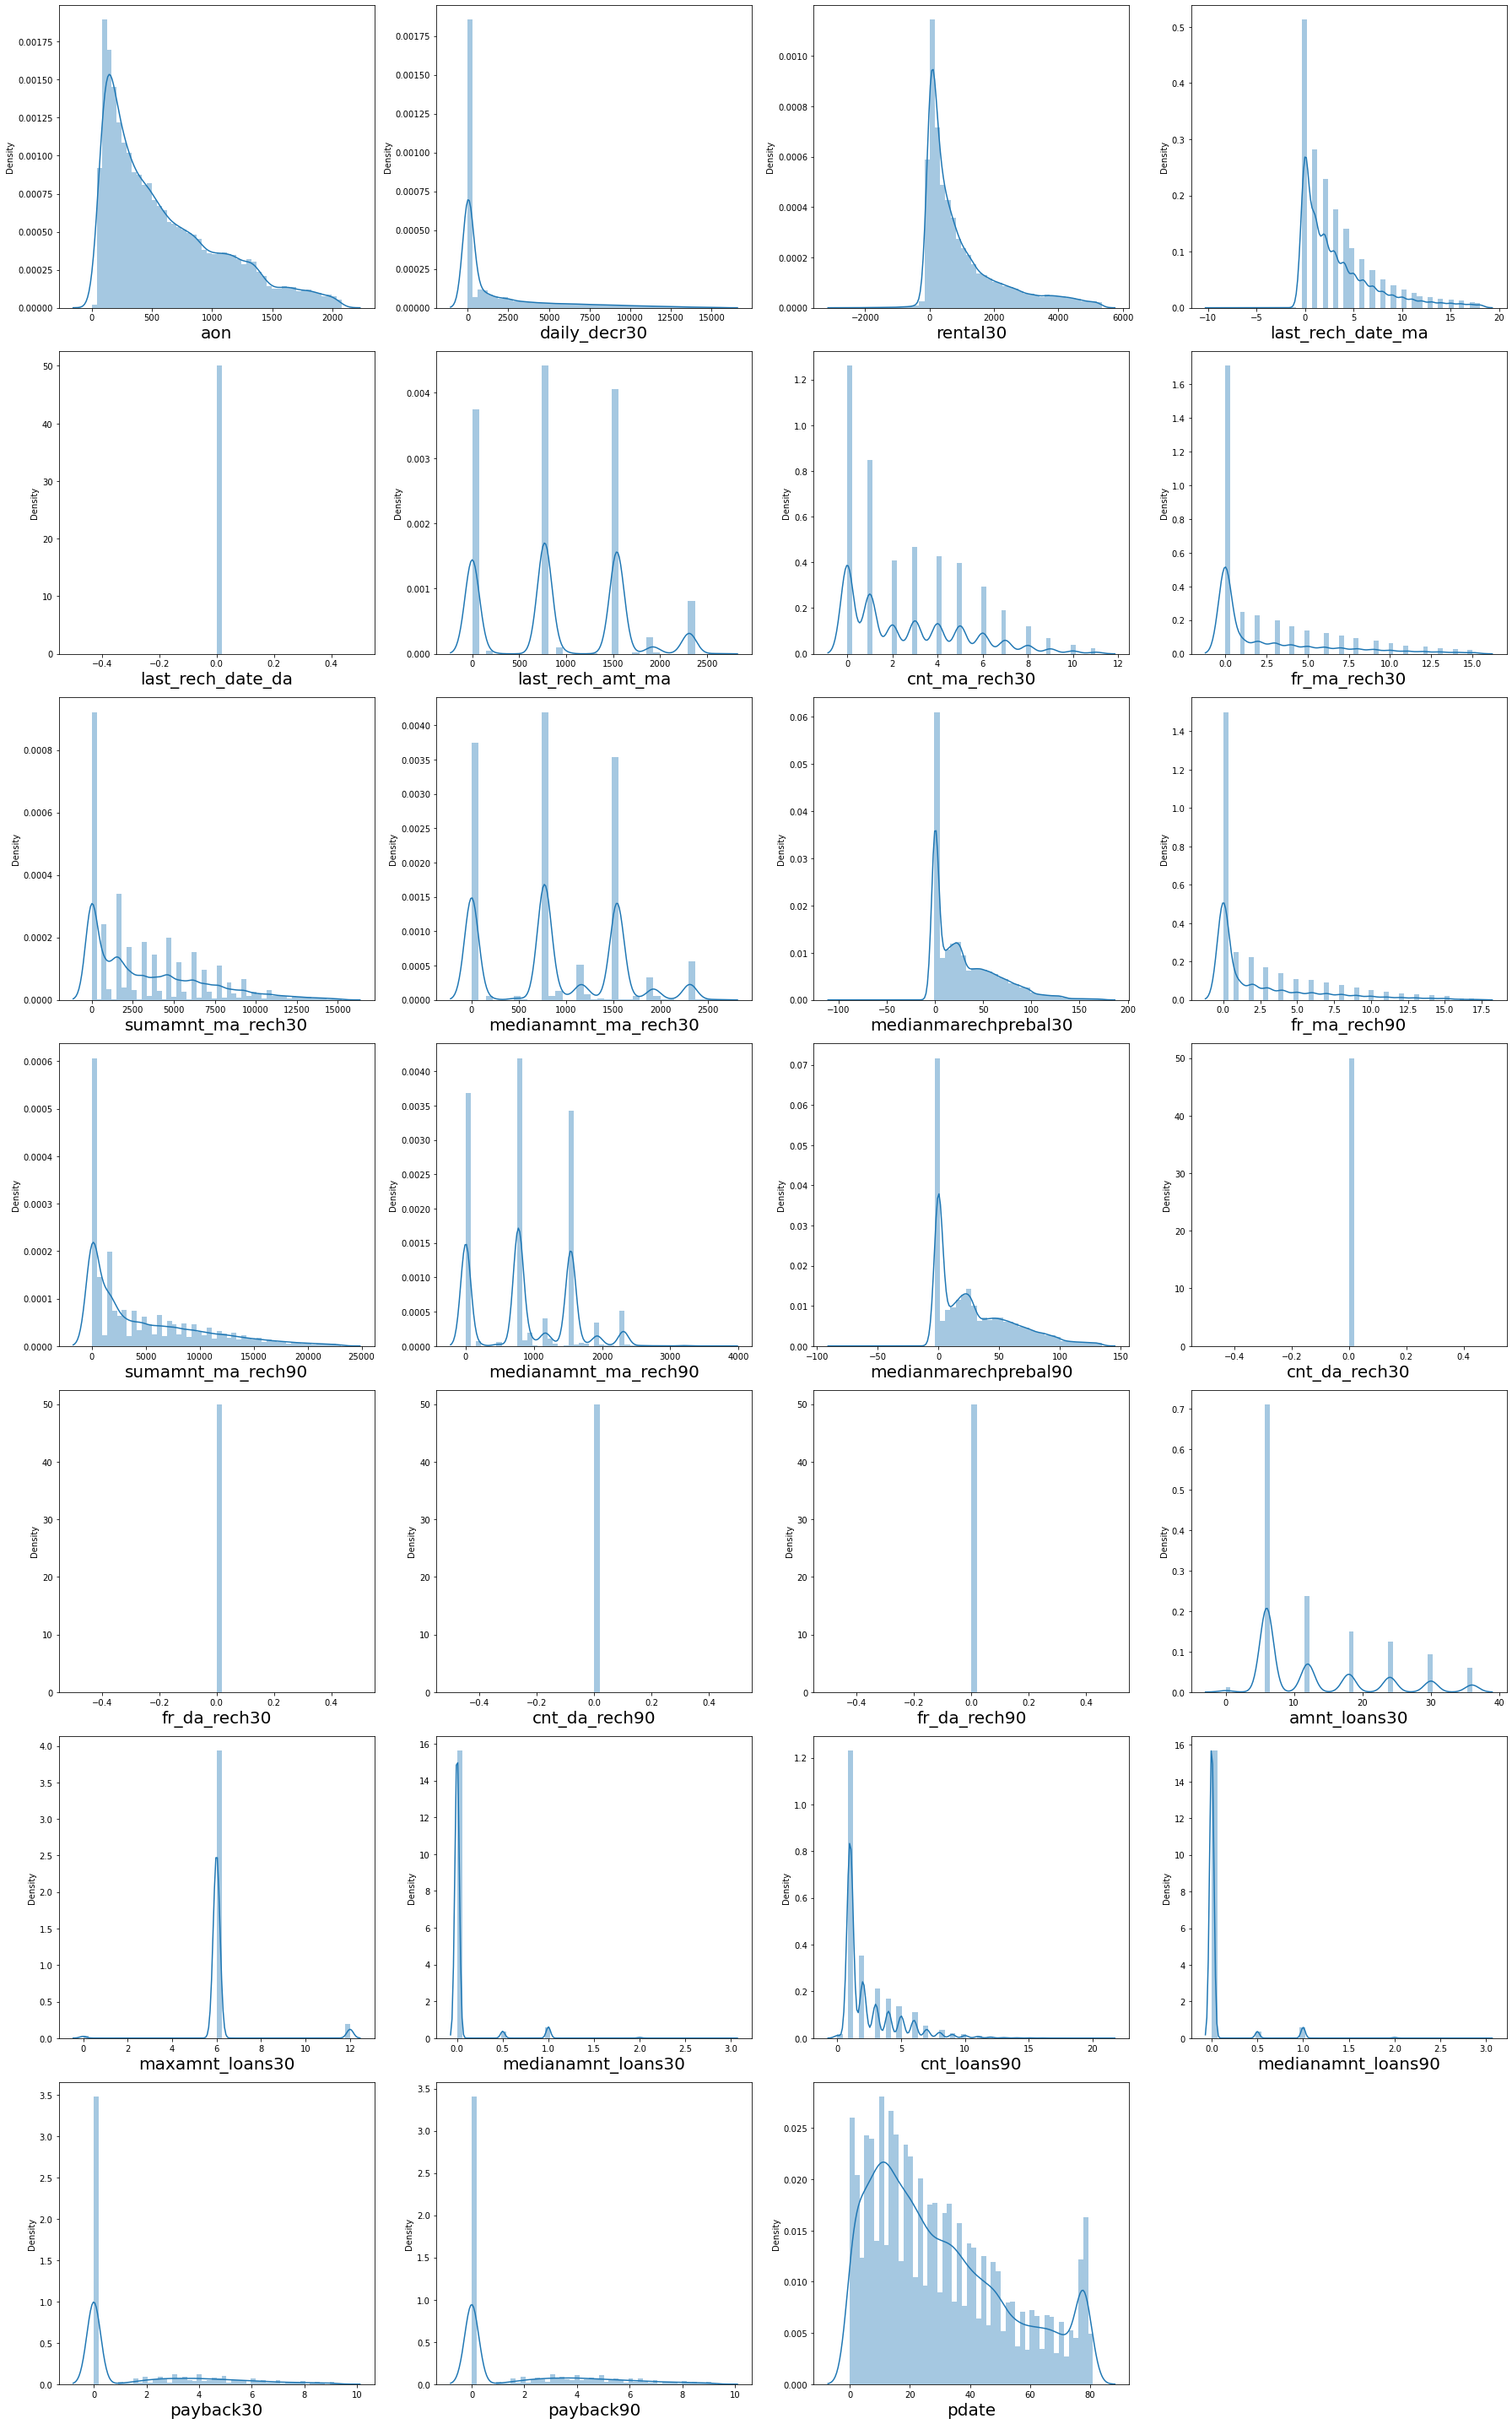

In [63]:
plt.figure(figsize=(25,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 28:
        ax = plt.subplot(7,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [64]:
scaler = PowerTransformer(method='yeo-johnson')

In [65]:
df[['aon', 'daily_decr30', 'rental30', 'last_rech_amt_ma', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30', 'cnt_loans90', 'payback30', 'payback90', 'pdate']] = scaler.fit_transform(df[['aon', 'daily_decr30', 'rental30', 'last_rech_amt_ma', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30', 'cnt_loans90', 'payback30', 'payback90', 'pdate']].values)

In [66]:
df

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,fr_da_rech90,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,1,0.178520,0.648544,0.007372,3.0,0.0,0.814544,1,-0.923189,0.111431,...,0,0,-0.772417,6.0,0.0,-0.810994,0.0,-0.729477,-0.755843,1.723448
1,1,1.190855,-0.303891,1.051029,1.0,0.0,0.814544,4,0.138000,0.878518,...,0,0,1.267761,6.0,0.0,1.120040,0.0,1.225840,1.148384,-0.592980
2,1,0.180703,-0.584660,-0.229641,11.0,0.0,0.263985,1,-0.923189,-0.183535,...,0,0,-0.772417,6.0,0.0,-0.810994,0.0,-0.729477,-0.755843,-1.121686
3,1,1.523565,-0.754717,-0.081795,8.0,0.0,0.814544,2,1.144287,0.310371,...,0,0,0.229623,6.0,0.0,0.248263,0.0,1.385777,1.325618,-0.796720
4,1,0.799604,-0.431277,-0.592708,2.0,0.0,0.814544,5,1.144287,1.027569,...,0,0,1.604754,6.0,0.0,1.343049,0.0,1.214361,1.135928,-0.530428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66185,1,-1.107185,1.731512,1.966895,3.0,0.0,0.814544,5,1.240540,1.026855,...,0,0,1.267761,6.0,0.0,1.625893,0.0,1.503143,1.468184,1.600995
66186,1,-1.552121,0.532417,-0.554822,1.0,0.0,0.814544,1,-0.923189,0.111431,...,0,0,-0.772417,6.0,0.0,-0.810994,0.0,-0.729477,-0.755843,0.417569
66187,1,0.867935,-0.718531,-0.660939,4.0,0.0,0.819219,3,0.586163,0.700007,...,0,0,-0.772417,6.0,0.0,-0.810994,0.0,-0.729477,-0.755843,-1.895924
66188,0,0.881813,-1.191309,-0.726891,0.0,0.0,-1.545702,0,-0.923189,-1.486646,...,0,0,-0.772417,6.0,0.0,-0.810994,0.0,-0.729477,-0.755843,-1.321083


In [67]:
x = df.drop('label',axis=1)
y = df['label']

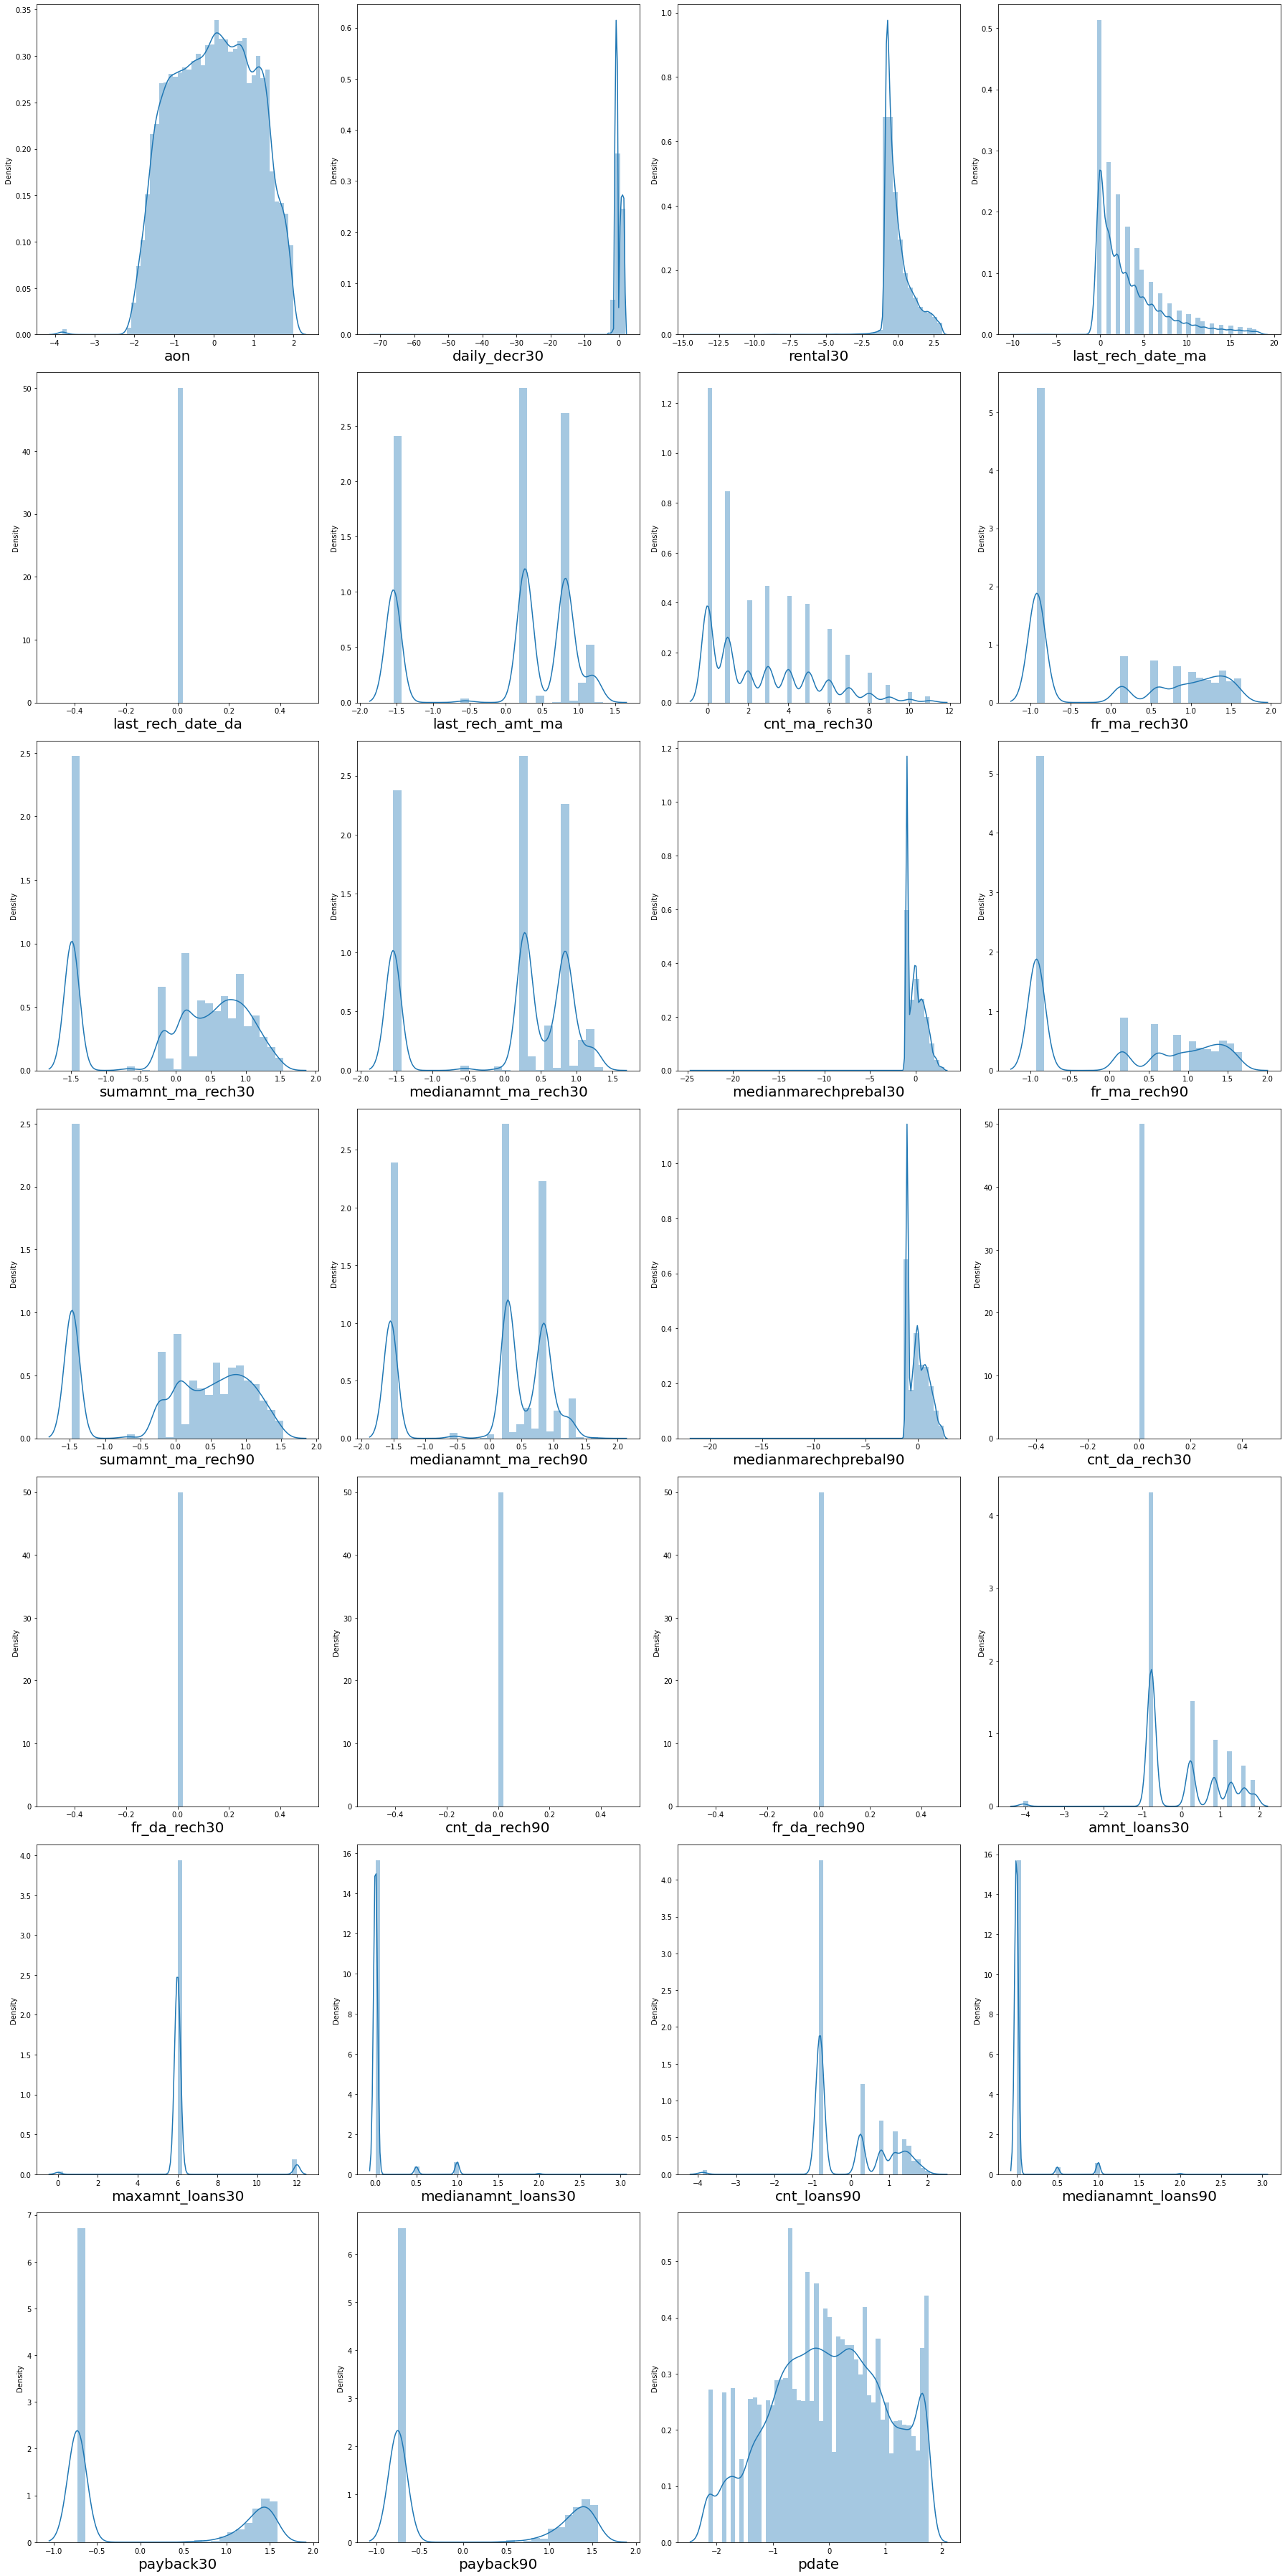

In [68]:
plt.figure(figsize=(25,50), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 28:
        ax = plt.subplot(7,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [69]:
x = df.drop(['label'],axis=1)
y = df['label']

In [70]:
df['label'].value_counts()

1    52900
0    13290
Name: label, dtype: int64

There is a imbalance between Label hence have applied OverSampling method to balance the dataset

In [71]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [74]:
ove_smp=SMOTE(0.80)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [75]:
print (y_train.value_counts())
print (y_train_new.value_counts())

1    52366
0    13162
Name: label, dtype: int64
1    52366
0    41892
Name: label, dtype: int64


Now the data is balanced

In [76]:
X_scale = x_train_new
y = y_train_new

Scaled the Data

# Model Buidling

# LogisticRegression

In [77]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7559091873541269 Random_state 1
max_accuracy 0.7559091873541269 max_Random_state 1
accuracy 0.7591343093570974 Random_state 2
max_accuracy 0.7591343093570974 max_Random_state 2
accuracy 0.7572246976448123 Random_state 3
accuracy 0.757436876723955 Random_state 4
accuracy 0.7585826437513261 Random_state 5
accuracy 0.7604073838319542 Random_state 6
max_accuracy 0.7604073838319542 max_Random_state 6
accuracy 0.7546785486950986 Random_state 7
accuracy 0.7581158497772119 Random_state 8
accuracy 0.7584553363038404 Random_state 9
accuracy 0.7551029068533842 Random_state 10
accuracy 0.7583704646721833 Random_state 11
accuracy 0.7599830256736686 Random_state 12
accuracy 0.7542117547209846 Random_state 13
accuracy 0.7609590494377254 Random_state 14
max_accuracy 0.7609590494377254 max_Random_state 14
accuracy 0.7587099511988118 Random_state 15
accuracy 0.7547209845109272 Random_state 16
accuracy 0.7609590494377254 Random_state 17
accuracy 0.7603649480161256 Random_state 18
accuracy 0.76

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 108)

In [79]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [80]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 75.63%

===============Test Result===============
Accuracy Score: 76.53%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10530
           1       0.81      0.75      0.78     13035

    accuracy                           0.77     23565
   macro avg       0.76      0.77      0.76     23565
weighted avg       0.77      0.77      0.77     23565

Cross Validation Score-  0.7581637411762807


# RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.99%

===============Test Result===============
Accuracy Score: 92.82%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     10530
           1       0.93      0.94      0.94     13035

    accuracy                           0.93     23565
   macro avg       0.93      0.93      0.93     23565
weighted avg       0.93      0.93      0.93     23565

Cross Validation Score-  0.9263515819159764


# DecisionTreeClassifier

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 87.96%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     10530
           1       0.90      0.89      0.89     13035

    accuracy                           0.88     23565
   macro avg       0.88      0.88      0.88     23565
weighted avg       0.88      0.88      0.88     23565

Cross Validation Score-  0.8765626123624191


# GradientBoostingClassifier

In [83]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 89.31%

===============Test Result===============
Accuracy Score: 89.16%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     10530
           1       0.91      0.90      0.90     13035

    accuracy                           0.89     23565
   macro avg       0.89      0.89      0.89     23565
weighted avg       0.89      0.89      0.89     23565

Cross Validation Score-  0.8872671099364631


# Support Vector Classifier

In [84]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 84.90%

===============Test Result===============
Accuracy Score: 85.05%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     10530
           1       0.87      0.86      0.86     13035

    accuracy                           0.85     23565
   macro avg       0.85      0.85      0.85     23565
weighted avg       0.85      0.85      0.85     23565

Cross Validation Score-  0.8468883500764136


# KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 91.41%

===============Test Result===============
Accuracy Score: 86.96%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     10530
           1       0.93      0.82      0.87     13035

    accuracy                           0.87     23565
   macro avg       0.87      0.88      0.87     23565
weighted avg       0.88      0.87      0.87     23565

Cross Validation Score-  0.876615400504811


# Findings

- LogisticsRegression - Cross Validation Score is 75.81%, Accuracy Score of Train Result is 75.63% and Test Result is 76.53%
- RandomForestClassifier - Cross Validation Score is 92.63%, Accuracy Score of Train Result is 99.99% and Test Result is 92.82%
- DecisionTreeClassifier - Cross Validation Score is 87.65%, Accuracy Score of Train Result is 100.00% and Test Result is 87.96%
- GradientBoostingClassifier - Cross Validation Score is 88.72%, Accuracy Score of Train Result is 89.31% and Test Result is 89.16%
- Support Vector Classifier - Cross Validation Score is 84.68%, Accuracy Score of Train Result is 84.90% and Test Result is 85.05%
- KNeighborsClassifier - Cross Validation Score is 87.66%, Accuracy Score of Train Result is 91.41% and Test Result is 86.96%

Choosing GradientBoostingClassifier as it has low variance between train and test result and has high accuracy

# Hyper Parameter Tuning

In [86]:
grid_param = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1,0.9,0.1),
    'min_samples_split':range(1,5),
    'min_samples_leaf': range(1,5)
}

Selecting Parameters for Hyper Parameter Tuning

In [87]:
grid_search = GridSearchCV(estimator=gbdt,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

Searching the best grid for the model

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                         'loss': ['deviance', 'exponential'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [89]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.8, 'loss': 'deviance', 'min_samples_leaf': 3, 'min_samples_split': 2}


These are the best parameters 

In [90]:
gbdt = GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=2, learning_rate=0.8, loss='deviance')
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=3)

Applying best parameters to train the model

In [91]:
y_pred = gbdt.predict(x_test)
pred = gbdt.predict(x_train)

In [95]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))
scr_log = cross_val_score(gbdt,X_scale,y,cv=5)
print('Cross Validation Score- ', scr_log.mean())

Train Accuracy Score: 92.27%
Test Accuracy Score: 91.71%
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10530
           1       0.92      0.93      0.93     13035

    accuracy                           0.92     23565
   macro avg       0.92      0.92      0.92     23565
weighted avg       0.92      0.92      0.92     23565

Cross Validation Score-  0.9125492495263903


- Accuracy for train data increased from 89.31% to 92.27%.
- Accuracy for test data increased from 89.16% to 91.71%.
- Precision, Recall and F1-score increased from 89% to 92%.
- Cross Validation Score of the model increased from 88.72% to 91.25%.

# AUC ROC Curve

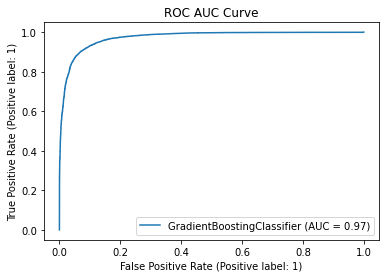

In [93]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbdt,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

AUC score is 97% and the model accuracy is 91.71% which is pretty good

# Saving the Model

In [94]:
file = 'Micro_Credit_Defaulter.pickle'
pickle.dump(gbdt, open(file, 'wb'))